In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/merged_data.csv')

# Apply conditions
output_power_condition = df['Stage3_OutputPower'] > 1
df['Time_diff_stg3'] = pd.to_timedelta(df['Time_diff_stg3'])
time_diff_condition = df['Time_diff_stg3'] < pd.Timedelta(seconds=1)
time_threshold = pd.Timestamp('2024-06-17 10:08:10.0000')
df['Time'] = pd.to_datetime(df['Time'])

# Filter the dataframe based on conditions
filtered_df = df[output_power_condition & time_diff_condition]
filtered_df = filtered_df[filtered_df['Time'] > time_threshold]

# Keep only the required columns
filtered_df = filtered_df[['Time', 'Stage3_OutputPower', 'Stage3_Piezo', 'Stage3_Stepper', 'Intensities', 'Wavelengths']]

# Convert 'Time' column to datetime for proper plotting
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'])

# Customize the plot

print(filtered_df.describe())

       Stage3_OutputPower  Stage3_Piezo  Stage3_Stepper
count         7841.000000   7841.000000     7841.000000
mean             1.927257     -0.394042  -319759.020661
std              0.086815      0.554561    10342.107506
min              1.684960     -1.614288  -338879.000000
25%              1.863999     -0.816376  -327457.000000
50%              1.914118     -0.351685  -318127.000000
75%              1.976199      0.020630  -309020.000000
max              2.263430      1.054535  -302907.000000


In [2]:
def plot_columns(df, time_column, *columns_to_plot):

    for column in columns_to_plot:
        plt.figure(figsize=(12, 6))
        plt.plot(df[time_column], df[column], label=column)
        plt.title(column)
        plt.xlabel(time_column)
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.close()


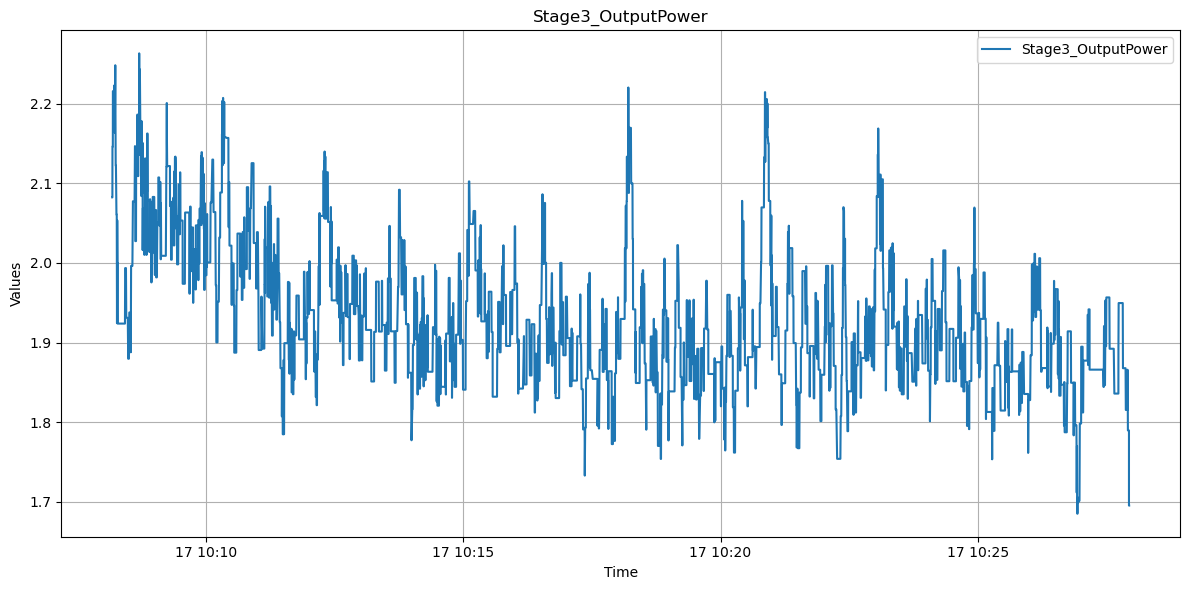

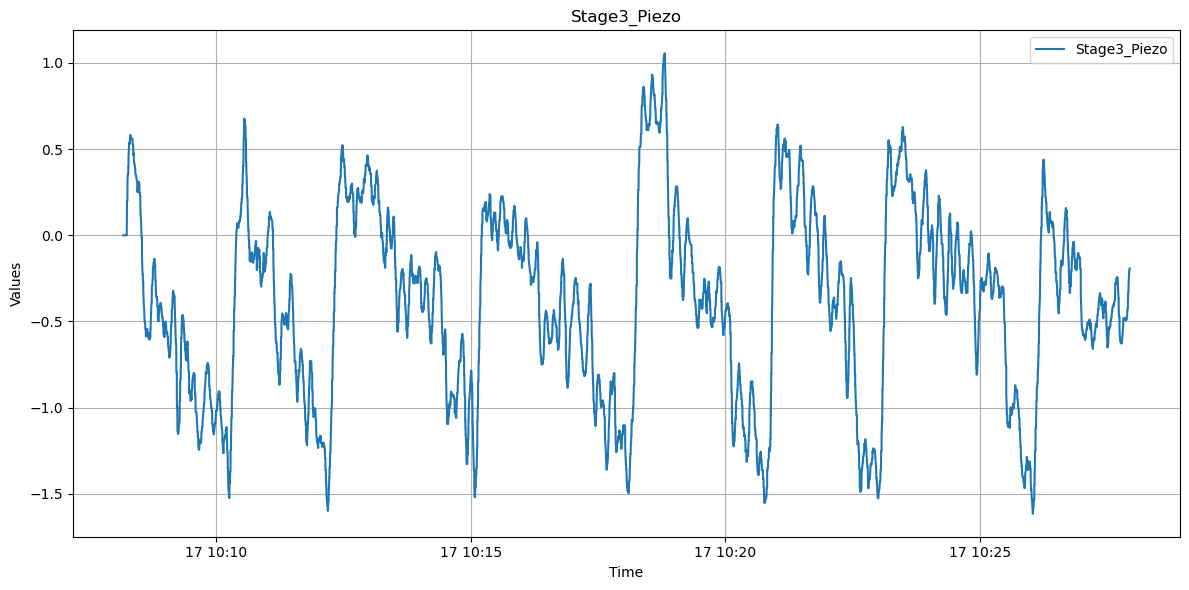

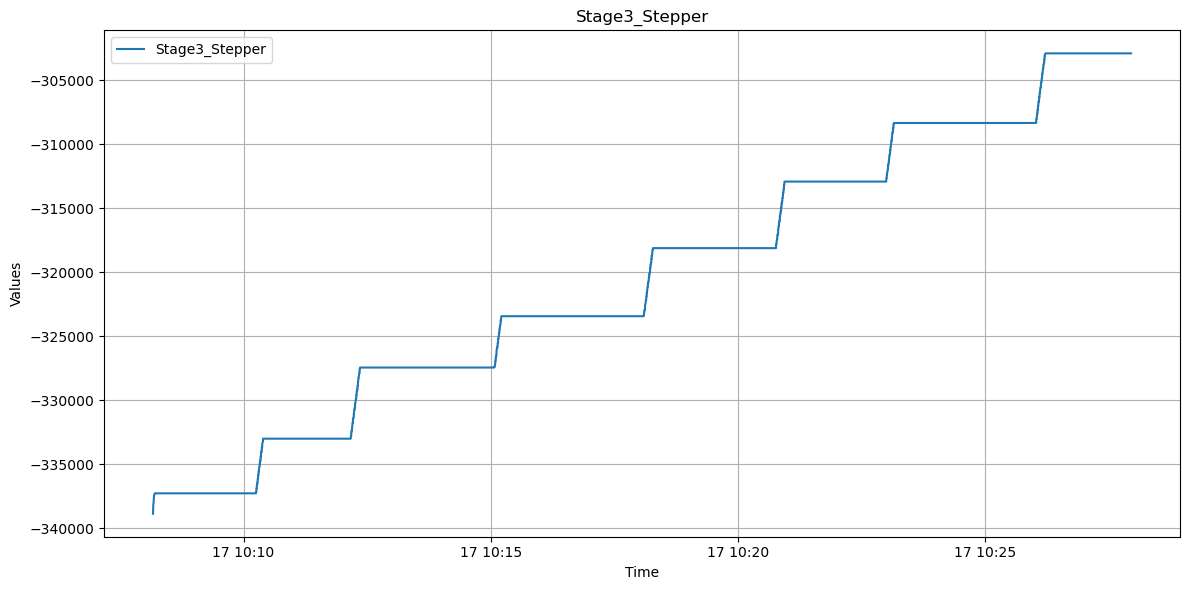

In [3]:
plot_columns(filtered_df, 
             'Time', 
             'Stage3_OutputPower', 
             'Stage3_Piezo', 
             'Stage3_Stepper')

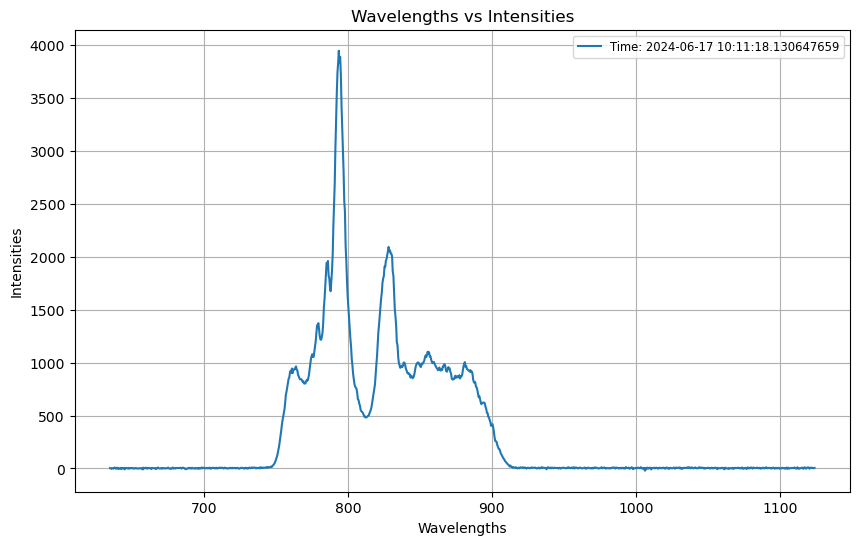

In [4]:
# Assuming 'Wavelengths' and 'Intensities' are lists or strings of lists
# Convert them to usable formats if they are not already
filtered_df['Wavelengths'] = filtered_df['Wavelengths'].apply(lambda x: eval(x) if isinstance(x, str) else x)
filtered_df['Intensities'] = filtered_df['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Plotting Wavelengths vs. Intensities for each row
plt.figure(figsize=(10, 6))
loc = 1000

plt.plot(filtered_df['Wavelengths'].iloc[loc], filtered_df['Intensities'].iloc[loc], label=f"Time: {filtered_df['Time'].iloc[loc]}")

plt.xlabel('Wavelengths')
plt.ylabel('Intensities')
plt.title('Wavelengths vs Intensities')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

## Filter data where stepper is constant

In [5]:
def get_constant_stepper_rows(df):
    df = df.sort_values(by='Time').reset_index(drop=True)
    
    # Identify rows where idx is different from both the previous and the next row
    unique_idx_rows = df[(df['Stage3_Stepper'] != df['Stage3_Stepper'].shift()) &
                         (df['Stage3_Stepper'] != df['Stage3_Stepper'].shift(-1))]

    # Select rows that are not in unique_idx_rows
    non_unique_idx_rows = df[~df.index.isin(unique_idx_rows.index)]
    
    return non_unique_idx_rows

In [6]:
constant_stepper_df = get_constant_stepper_rows(filtered_df)
constant_stepper_df.head()

Time  Stage3_OutputPower  Stage3_Piezo  \
1 2024-06-17 10:08:10.347822666            2.082440           0.0   
2 2024-06-17 10:08:10.431182861            2.146321           0.0   
3 2024-06-17 10:08:10.852890968            2.146321           0.0   
4 2024-06-17 10:08:10.929437160            2.215926           0.0   
5 2024-06-17 10:08:10.933794975            2.215926           0.0   

   Stage3_Stepper                                        Intensities  \
1       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
2       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
3       -337925.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
4       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   
5       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   

                                         Wavelengths  
1  [634.835144, 635.296997, 635.758911, 636.22082...  
2  [634.835144, 635.296997, 635.758911, 636.22082...  
3  [634.835144, 635.296997, 635.758911, 636.22082...  
4  [634.835144, 635.296997, 635.758911, 636.22082...  
5  [634.835144, 635.296997, 635.758911, 636.22082...

In [7]:
constant_stepper_df.describe()

Stage3_OutputPower  Stage3_Piezo  Stage3_Stepper
count         7834.000000   7834.000000     7834.000000
mean             1.927097     -0.393878  -319752.763467
std              0.086662      0.554441    10338.457573
min              1.684960     -1.614288  -338208.000000
25%              1.863999     -0.815552  -327457.000000
50%              1.914118     -0.351685  -318127.000000
75%              1.975079      0.020722  -309020.000000
max              2.263430      1.054535  -302907.000000

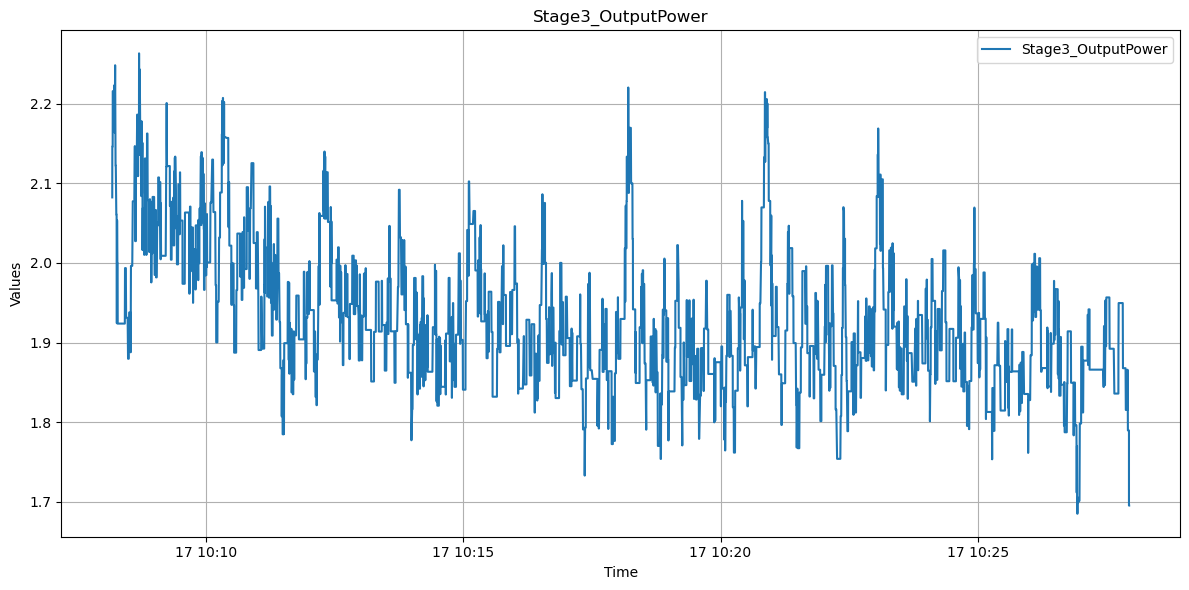

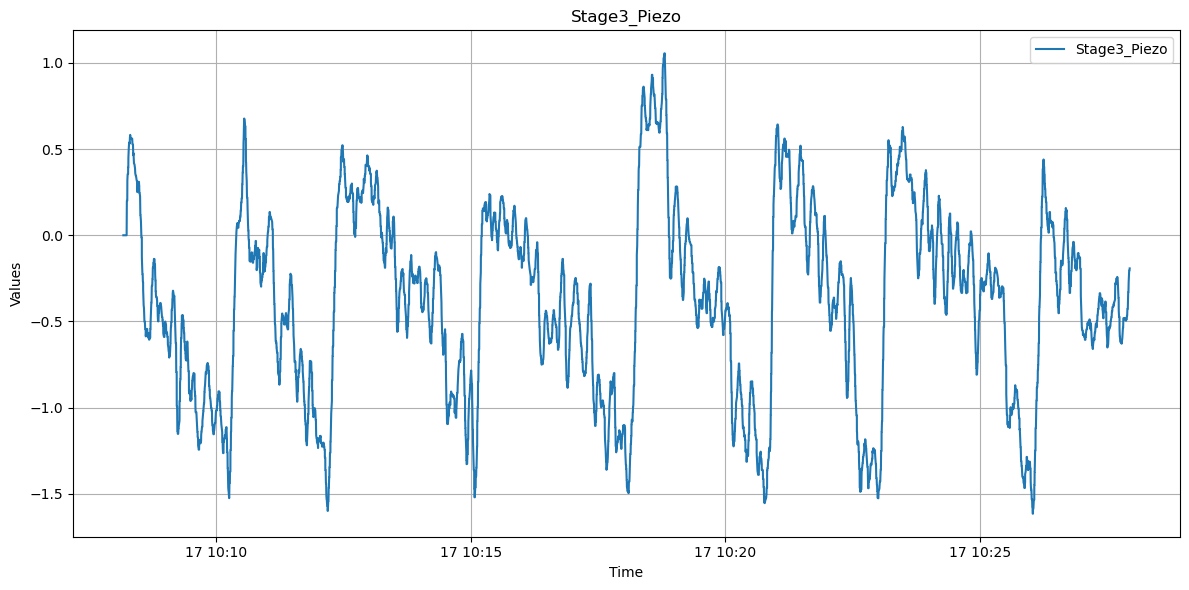

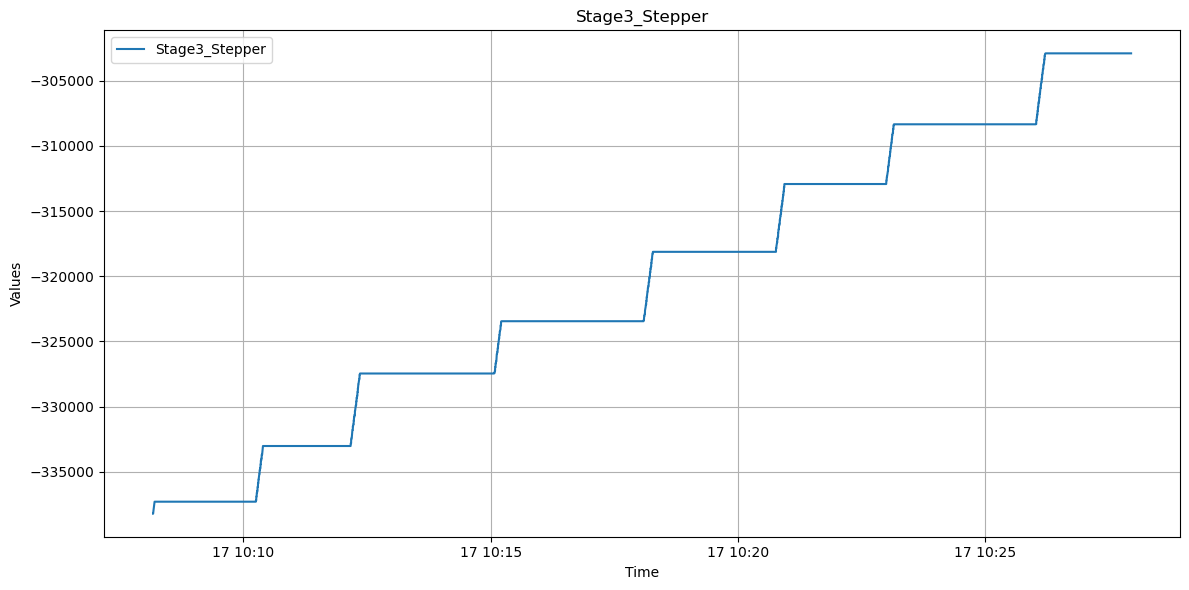

In [8]:
plot_columns(constant_stepper_df, 
             'Time', 
             'Stage3_OutputPower', 
             'Stage3_Piezo', 
             'Stage3_Stepper')

In [9]:
print(constant_stepper_df.Stage3_Stepper.value_counts().to_string())

-308347.0    1138
-323447.0    1136
-327457.0    1104
-318127.0     994
-312927.0     837
-302907.0     716
-333017.0     704
-337287.0     595
-320005.0       9
-331787.0       8
-303385.0       8
-314214.0       8
-314941.0       8
-315961.0       8
-316980.0       8
-321605.0       8
-320732.0       7
-315233.0       7
-317415.0       7
-329604.0       7
-311640.0       7
-309749.0       7
-307605.0       7
-306732.0       7
-329168.0       7
-320150.0       7
-327261.0       6
-335581.0       6
-316106.0       6
-310766.0       6
-309020.0       6
-314505.0       6
-310913.0       6
-316397.0       6
-319713.0       6
-319278.0       6
-321460.0       5
-310185.0       5
-322188.0       5
-321169.0       5
-314651.0       5
-332369.0       5
-305132.0       5
-306295.0       5
-320878.0       5
-304549.0       5
-319423.0       5
-318986.0       5
-318695.0       5
-307315.0       5
-318259.0       5
-334418.0       5
-317853.0       5
-304841.0       5
-330769.0       5
-308043.0 

In [10]:
def add_idx_column(df, time_column, stepper_column):
    """
    Adds an `idx` column to the dataset. The `idx` increments 
    whenever the value in the `Stage3_Stepper` column changes, 
    based on a time-sorted DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - time_column (str): The name of the column to sort by (time).
    - stepper_column (str): The name of the column to monitor for 
    changes.

    Returns:
    - pd.DataFrame: DataFrame with the added `idx` column.
    """
    # Sort the DataFrame by the time column
    df = df.sort_values(by=time_column).reset_index(drop=True)
    
    # Initialize idx column
    idx = 0
    idx_list = [idx]  # First row starts with idx = 0
    
    # Iterate through the rows of the DataFrame
    for i in range(1, len(df)):
        if df.loc[i, stepper_column] != df.loc[i - 1, stepper_column]:
            idx += 1  # Increment idx when Stage3_Stepper changes
        idx_list.append(idx)
    
    # Add the idx column to the DataFrame
    df['idx'] = idx_list
    
    return df


In [11]:
constant_stepper_df = add_idx_column(constant_stepper_df, time_column='Time', stepper_column='Stage3_Stepper')
constant_stepper_df.head()

Time  Stage3_OutputPower  Stage3_Piezo  \
0 2024-06-17 10:08:10.347822666            2.082440           0.0   
1 2024-06-17 10:08:10.431182861            2.146321           0.0   
2 2024-06-17 10:08:10.852890968            2.146321           0.0   
3 2024-06-17 10:08:10.929437160            2.215926           0.0   
4 2024-06-17 10:08:10.933794975            2.215926           0.0   

   Stage3_Stepper                                        Intensities  \
0       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
1       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
2       -337925.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
3       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   
4       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   

                                         Wavelengths  idx  
0  [634.835144, 635.296997, 635.758911, 636.22082...    0  
1  [634.835144, 635.296997, 635.758911, 636.22082...    0  
2  [634.835144, 635.296997, 635.758911, 636.22082...    1  
3  [634.835144, 635.296997, 635.758911, 636.22082...    1  
4  [634.835144, 635.296997, 635.758911, 636.22082...    1

## Make spectograms

In [12]:
type(constant_stepper_df['Wavelengths'].iloc[0])

list

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_spectrogram(df, specific_idx):
    """
    Creates a 3D spectrogram for a specific idx from the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing 'Time', 
    'Intensities', 'Wavelengths', and 'idx' columns.
    - specific_idx (int): The specific idx to filter the DataFrame.
    
    Returns:
    - None: Displays the 3D spectrogram plot.
    """
    # Filter the DataFrame based on the specific idx
    filtered_df = df[df['idx'] == specific_idx]
        
    if filtered_df.empty:
        print(f"No data found for idx: {specific_idx}")
        return
    
    # Prepare data for plotting
    times = pd.to_datetime(filtered_df['Time'])
    wavelengths = np.array(filtered_df['Wavelengths'].iloc[0])
    intensities = np.array([intensity for intensity in filtered_df['Intensities']])
    
    # Create meshgrid for the 3D plot
    T, W = np.meshgrid(times.astype(np.int64) / 1e9, wavelengths)
    
    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(W, T, intensities.T, cmap='viridis')

    # Set plot labels (SWITCHED)
    ax.set_xlabel("Wavelength (nm)")  
    ax.set_ylabel("Time (s)")        
    ax.set_zlabel("Intensity")
    ax.set_title(f"3D Spectrogram for idx: {specific_idx}, number of datapoints: {len(filtered_df)}")
    
    # Add color bar for intensity scale
    fig.colorbar(surf, ax=ax, label="Intensity")

    plt.show()
    
def plot_for_frequent_indices(df, threshold):
    # Get counts of each idx
    idx_counts = df['idx'].value_counts()
    
    # Filter to get idx values with count > threshold
    frequent_indices = idx_counts[idx_counts > threshold].index
    
    # Plot for each frequent idx
    for specific_idx in frequent_indices:
        plot_3d_spectrogram(df, specific_idx)

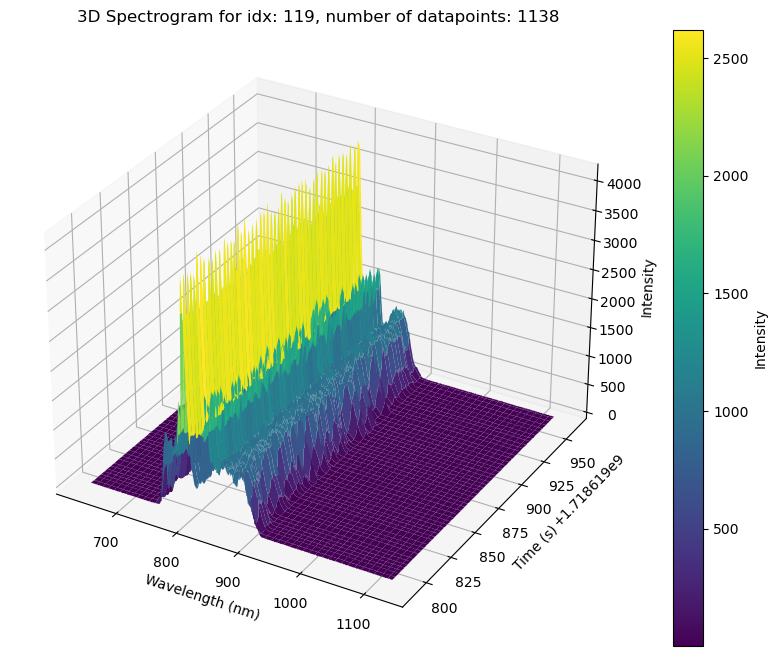

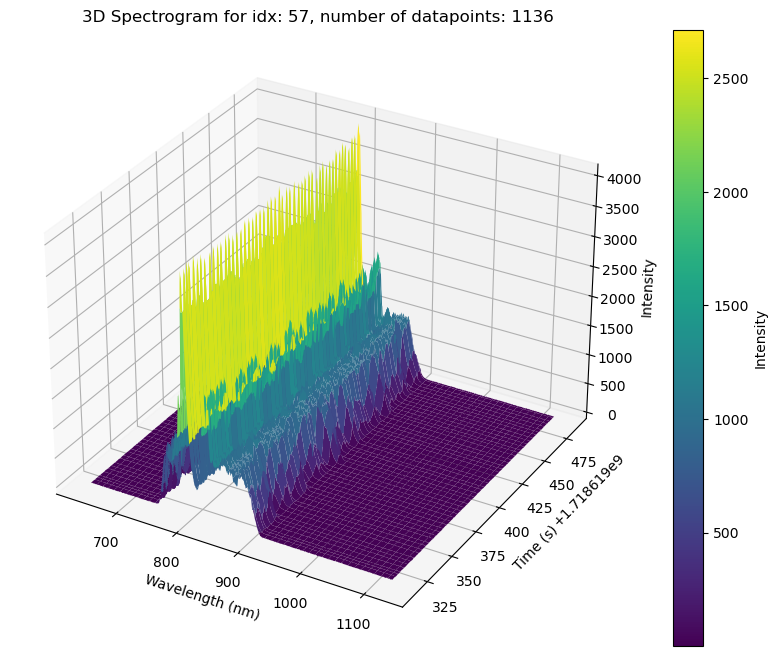

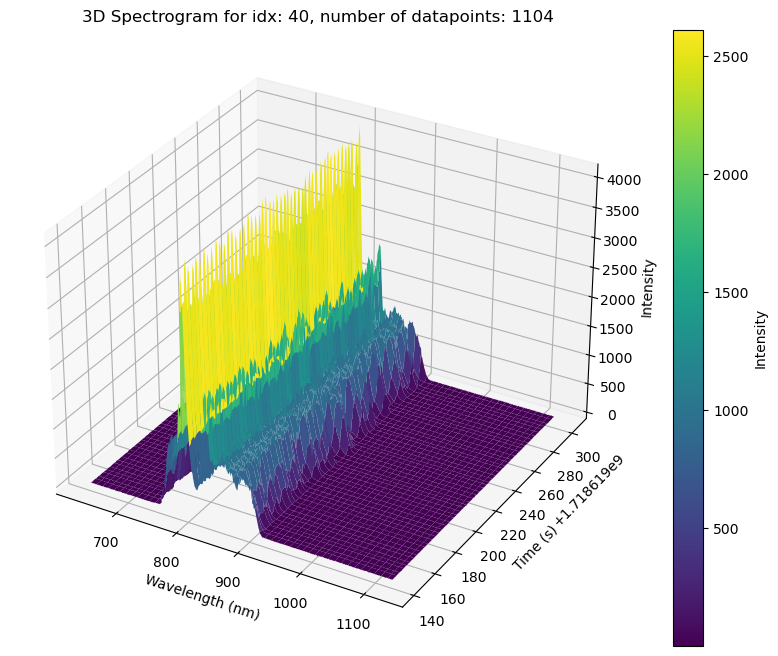

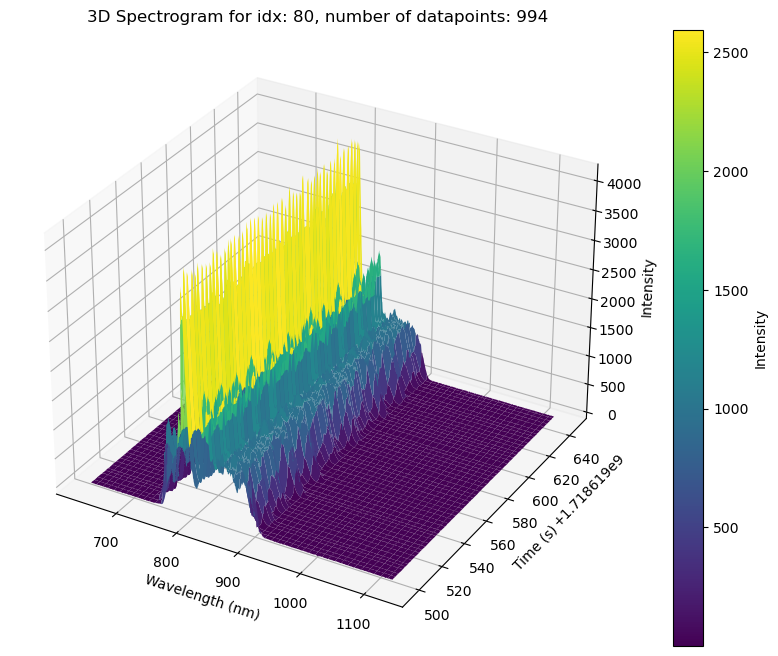

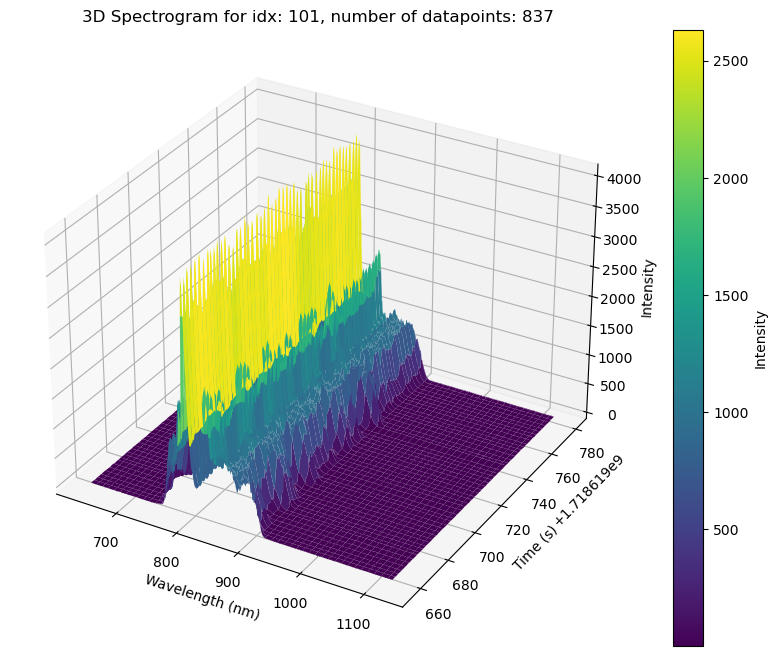

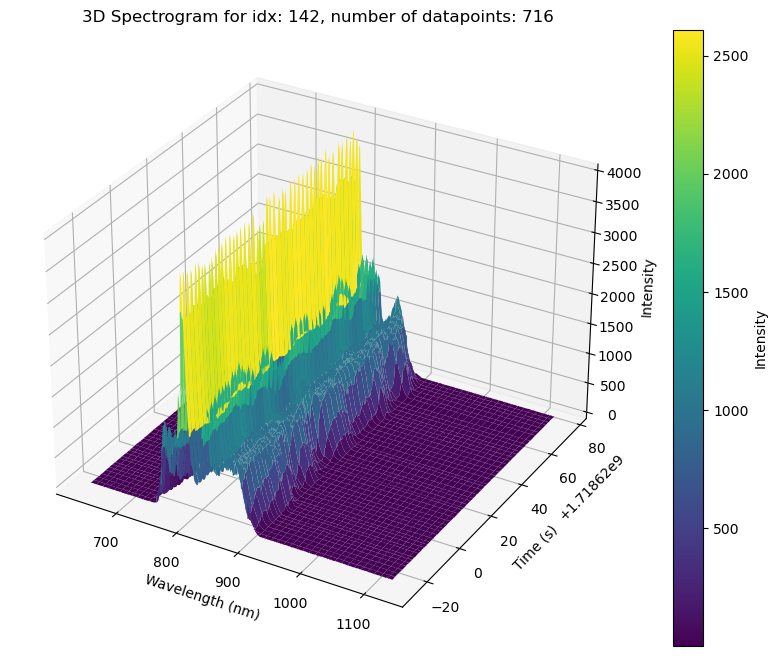

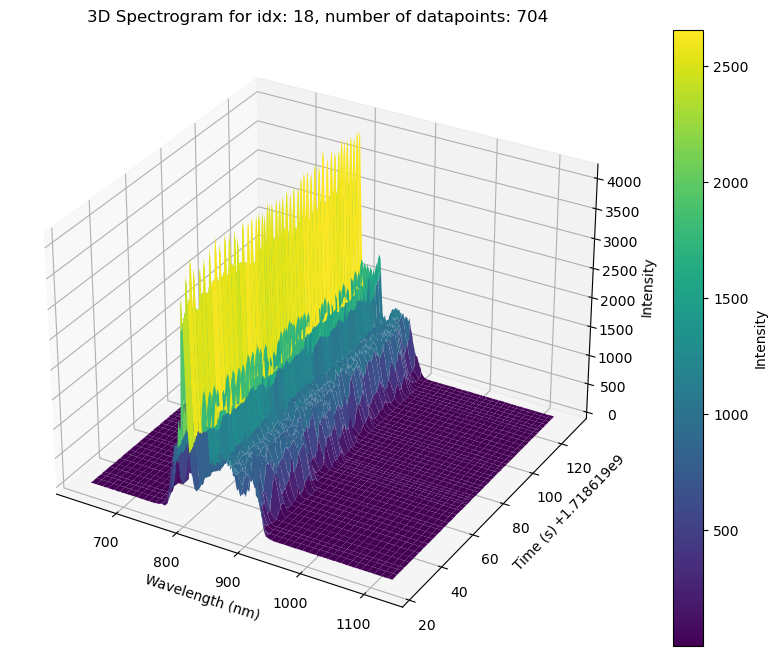

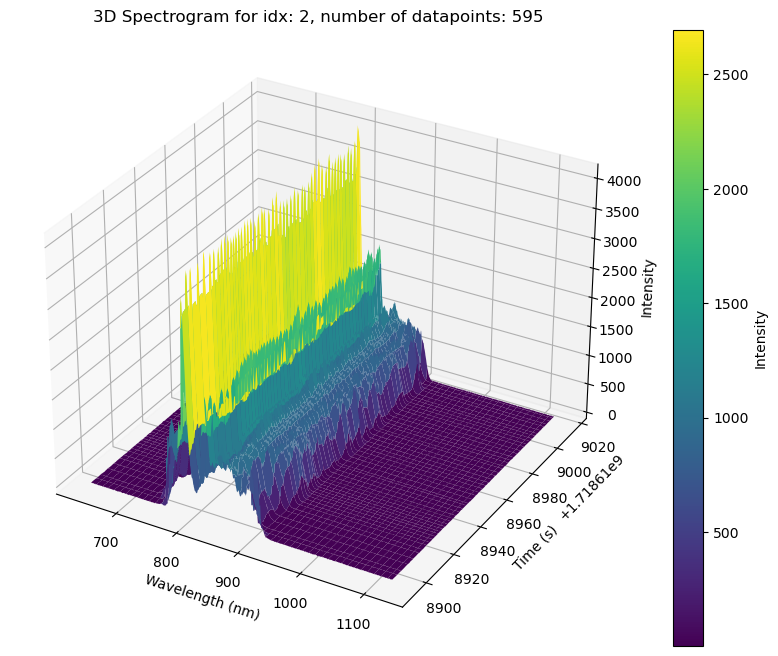

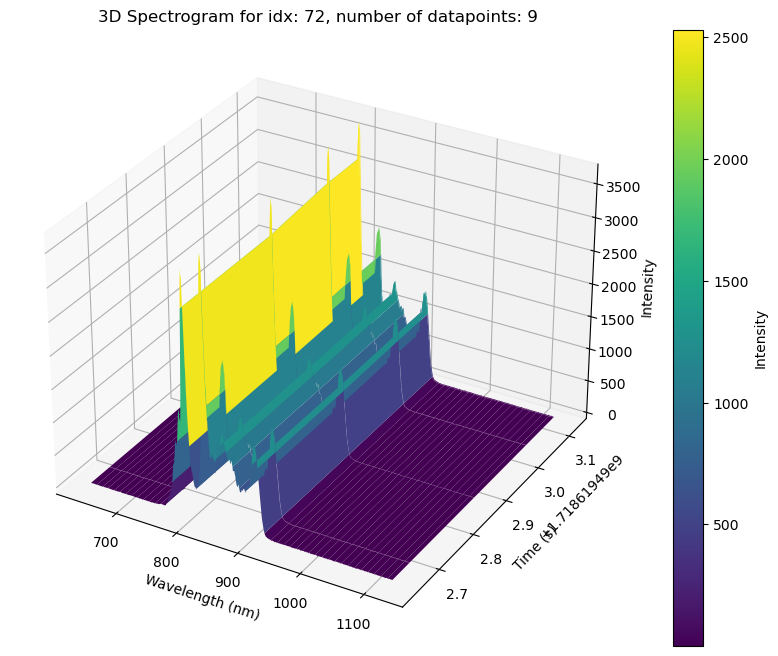

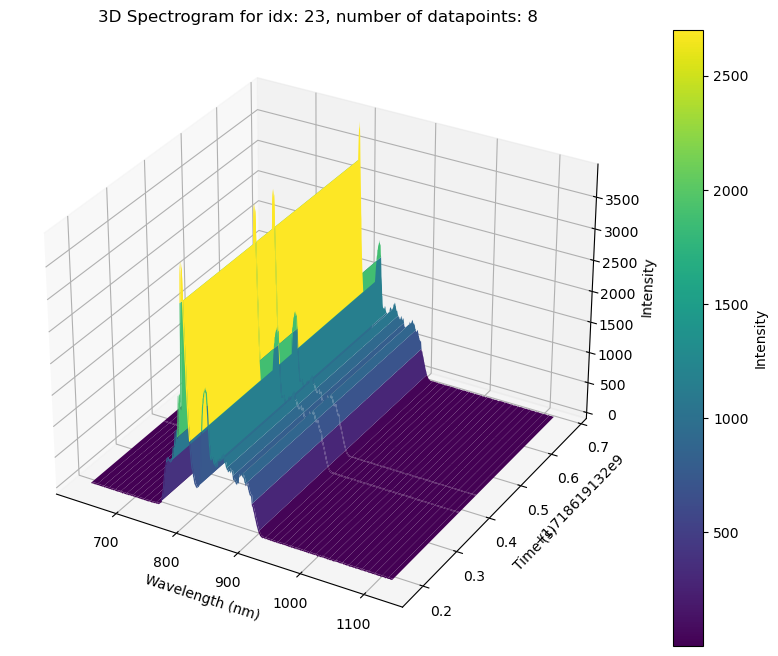

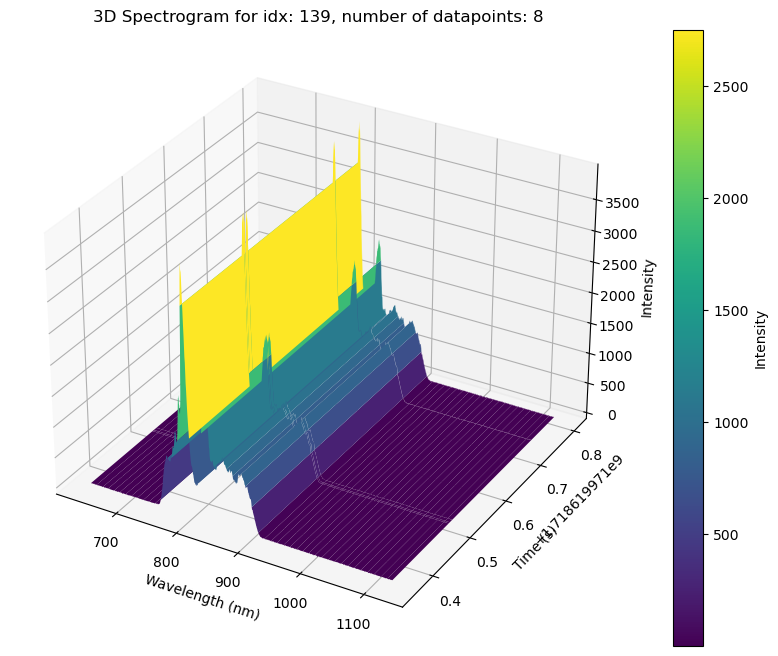

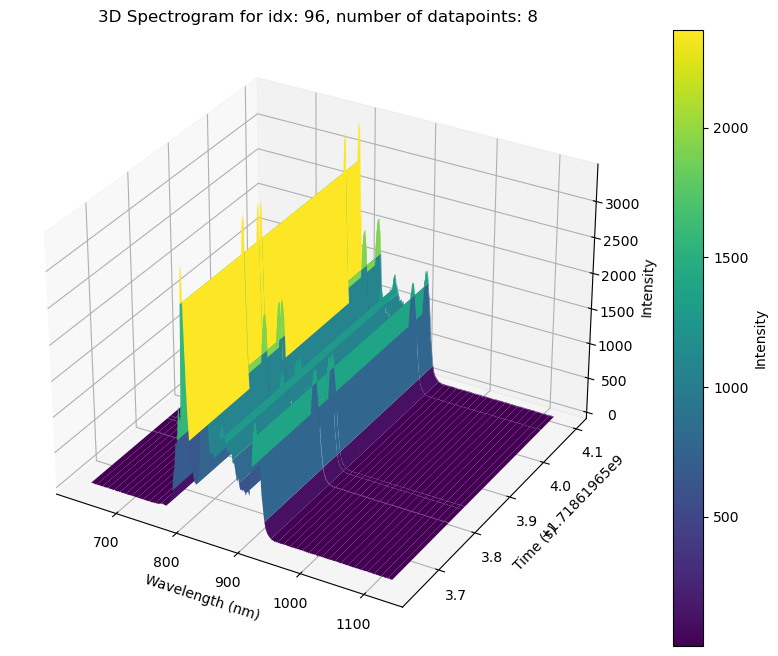

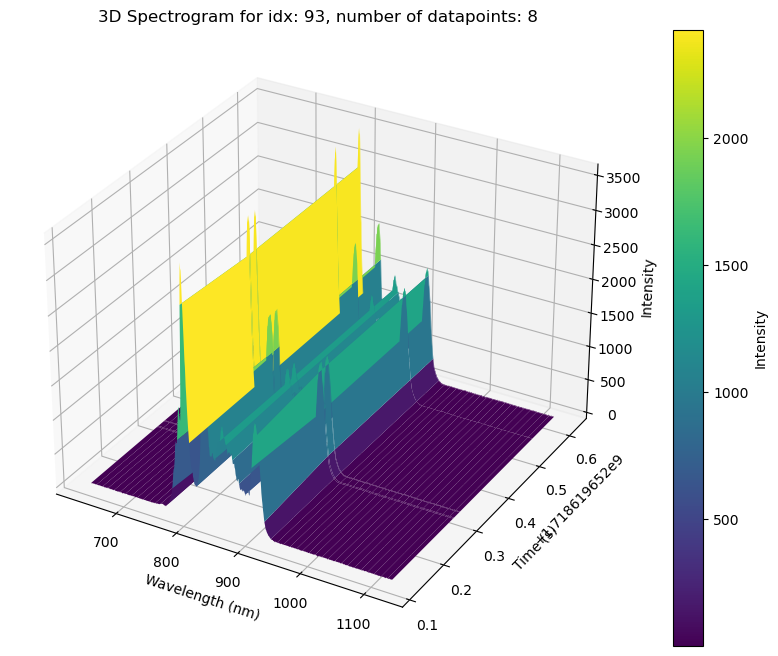

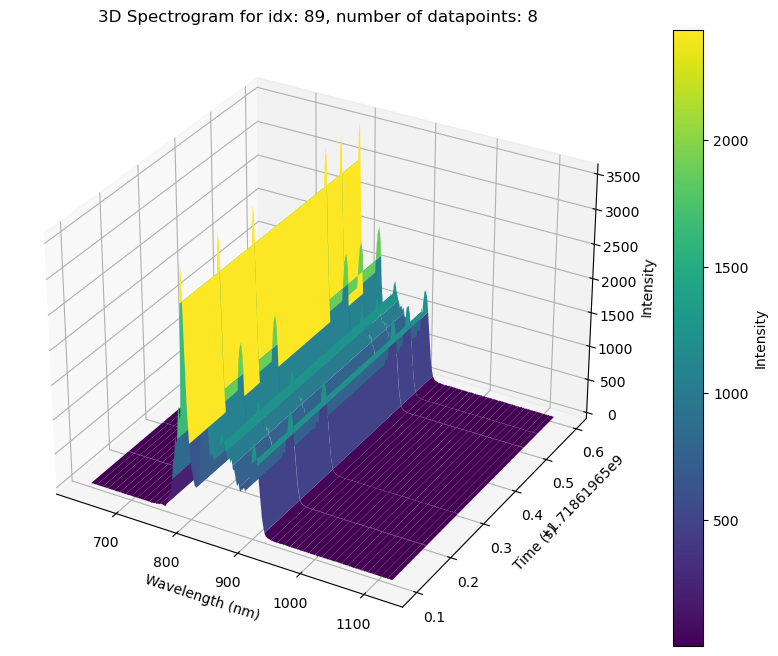

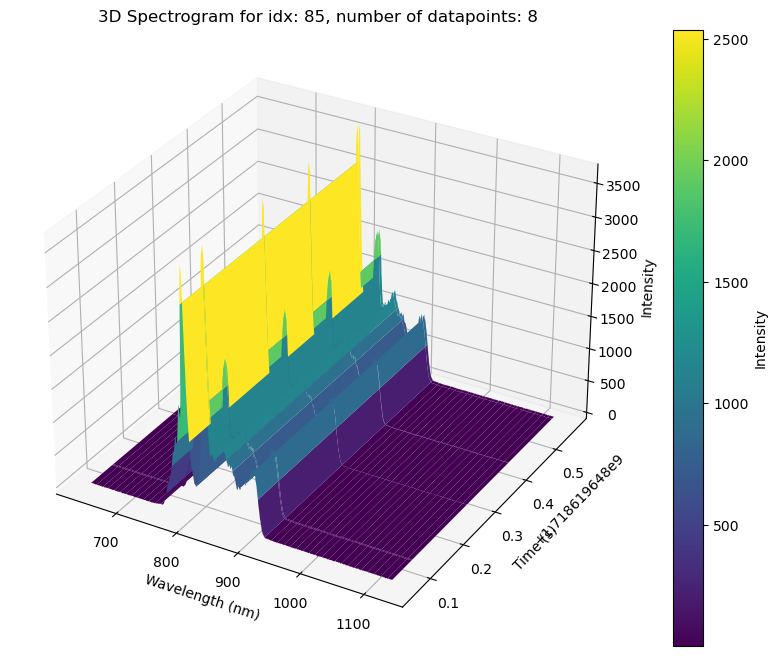

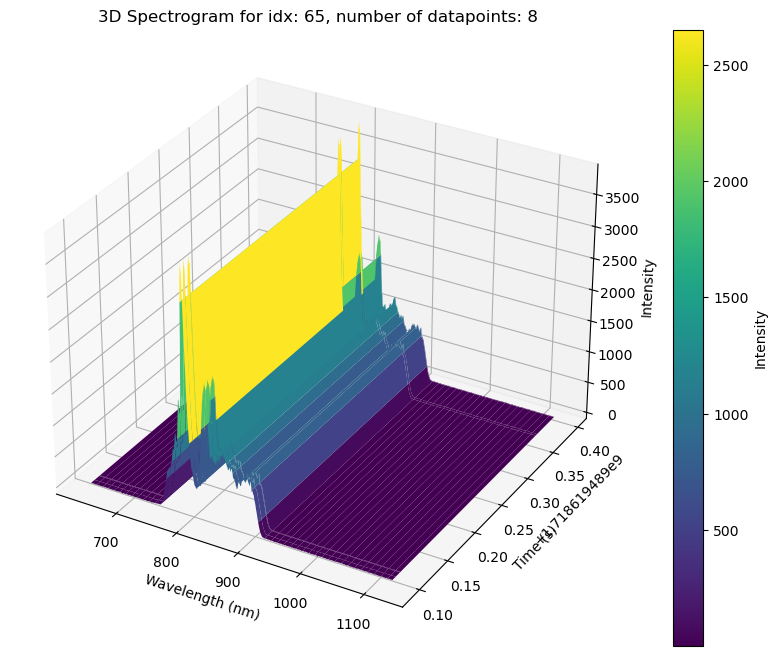

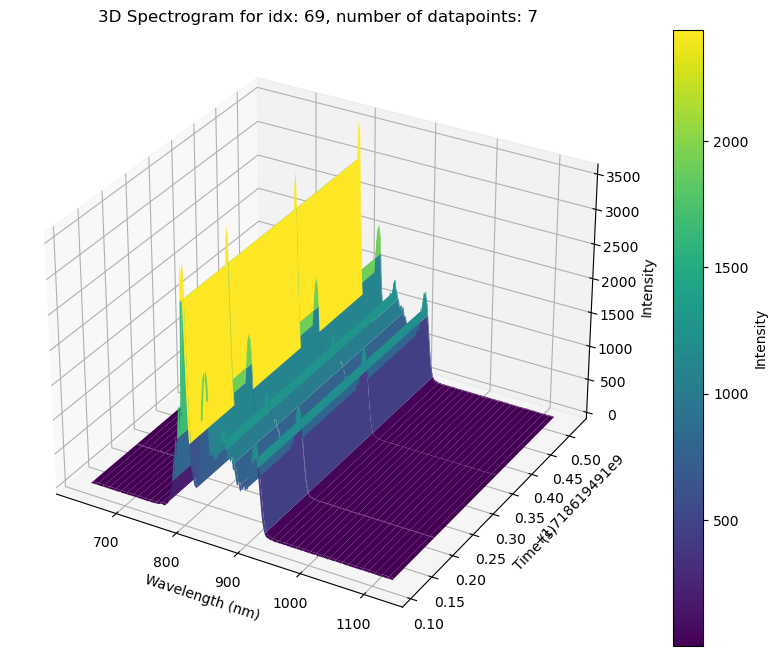

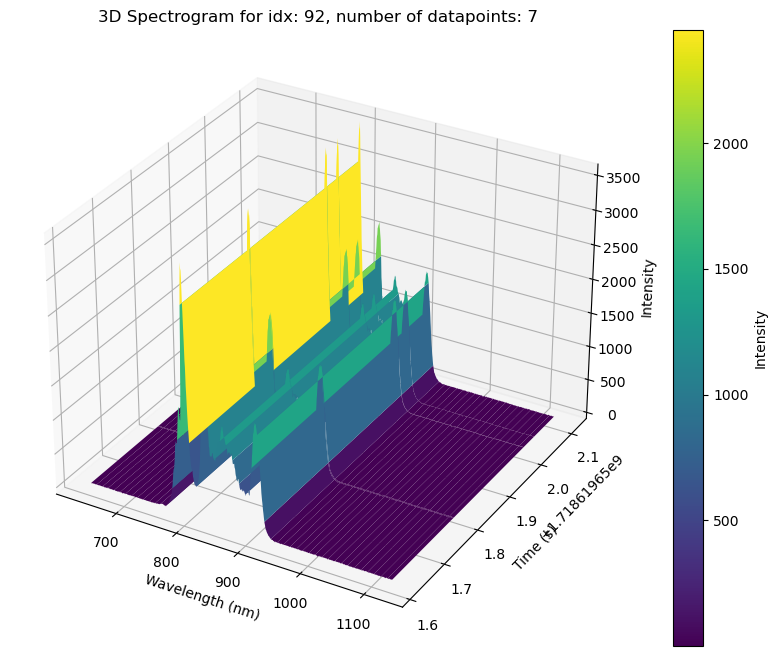

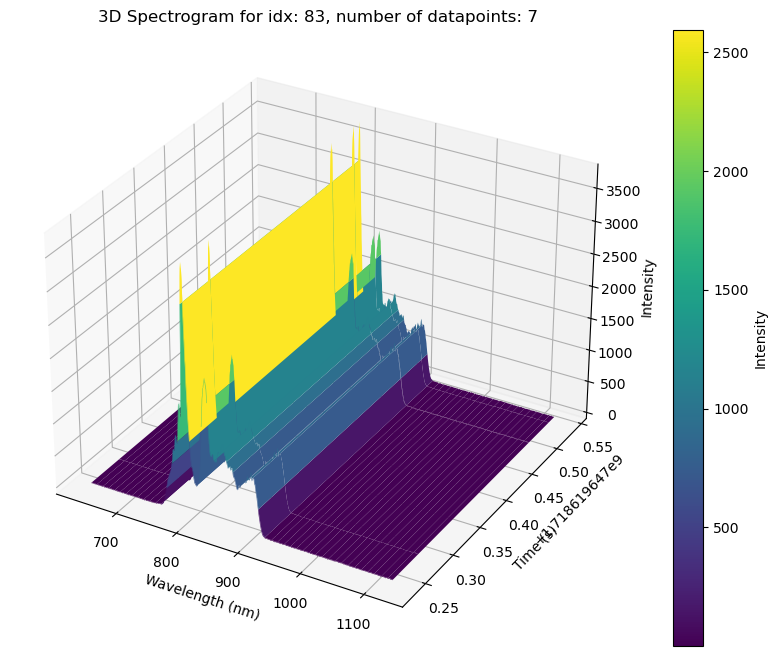

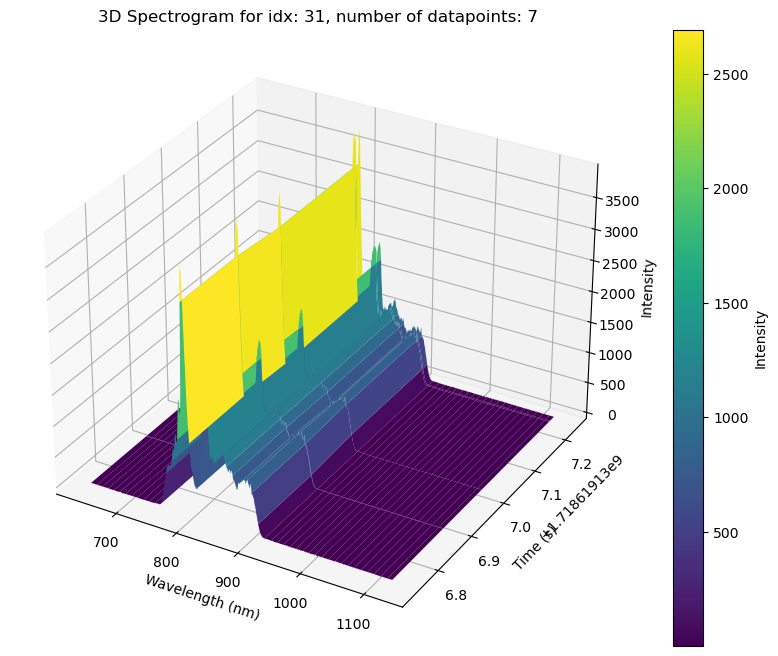

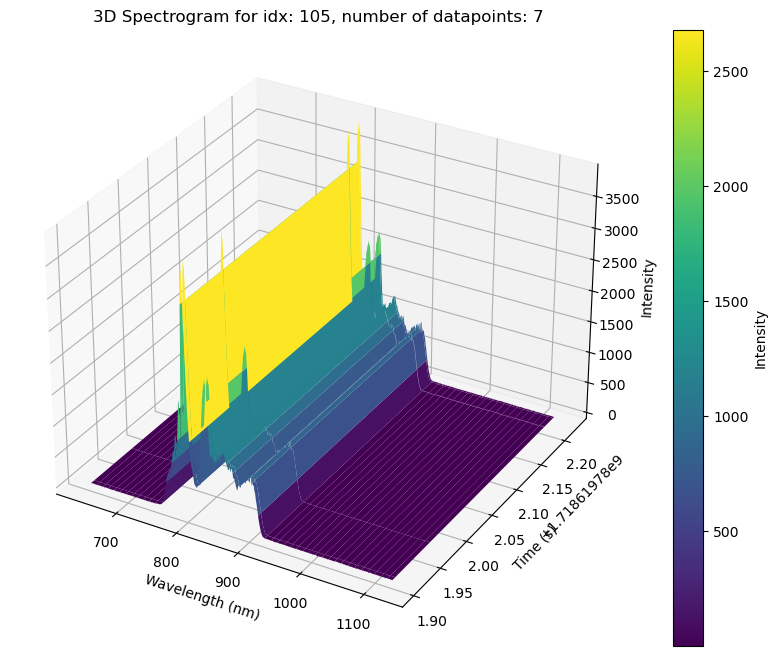

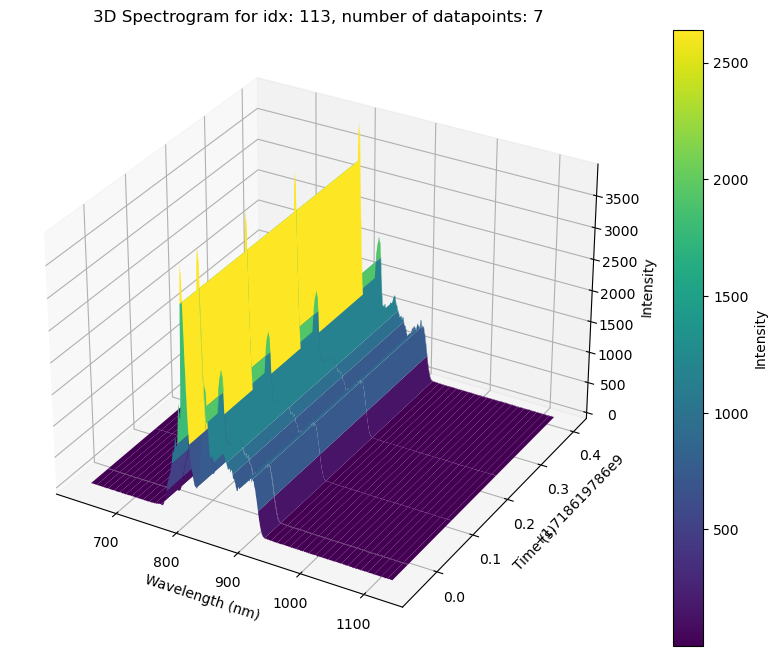

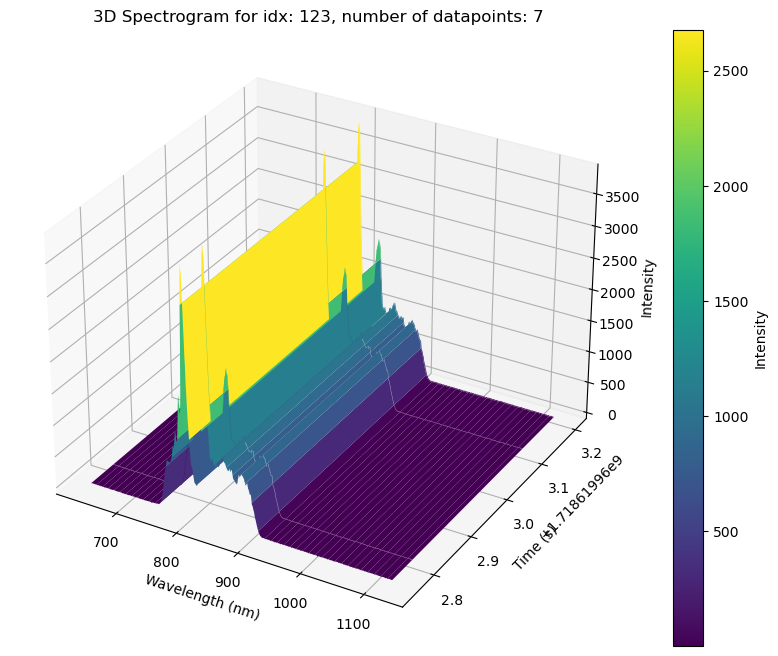

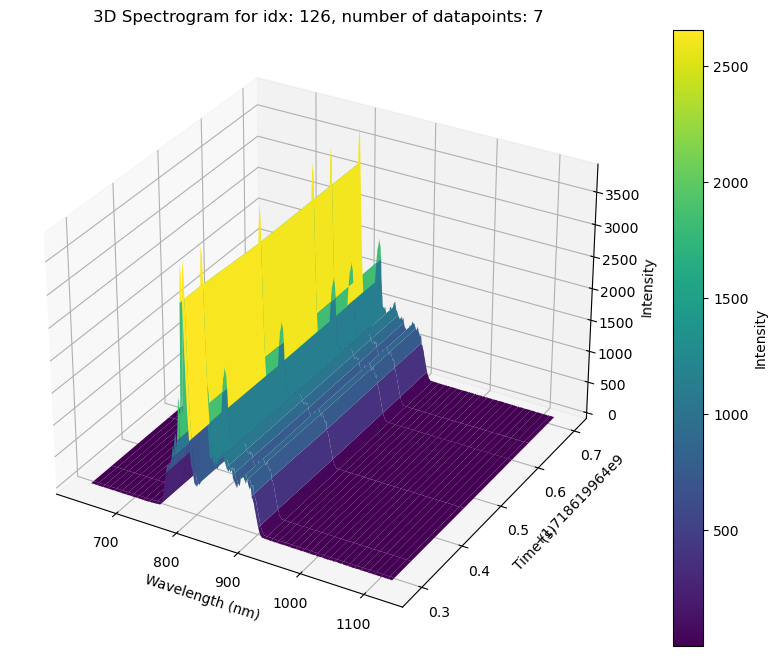

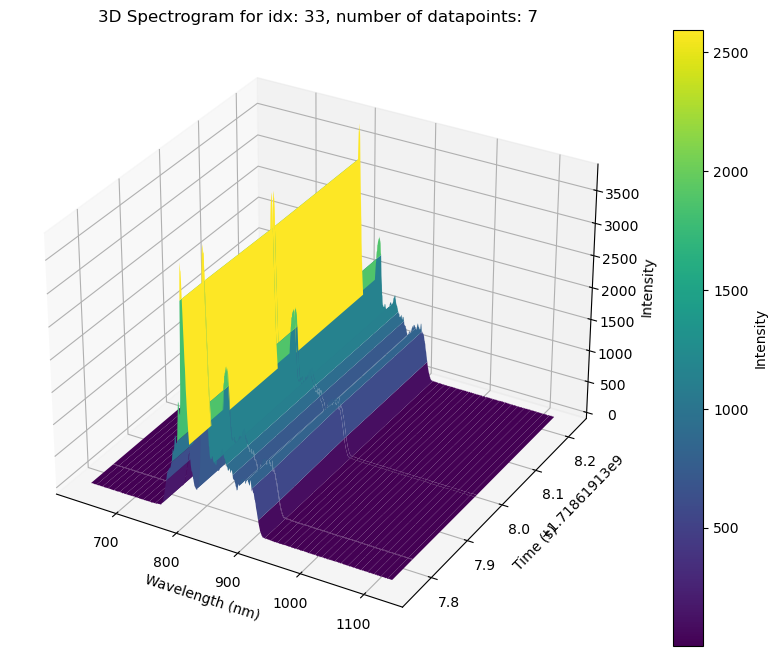

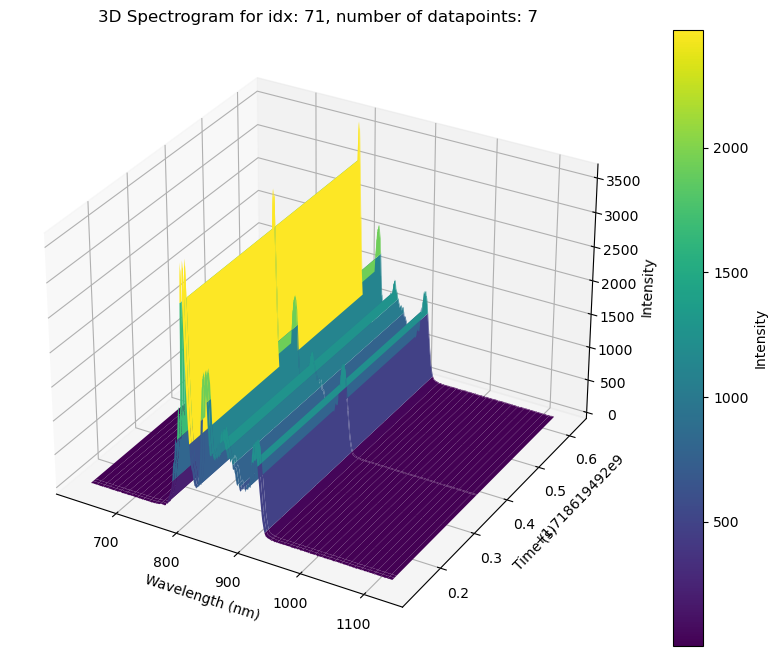

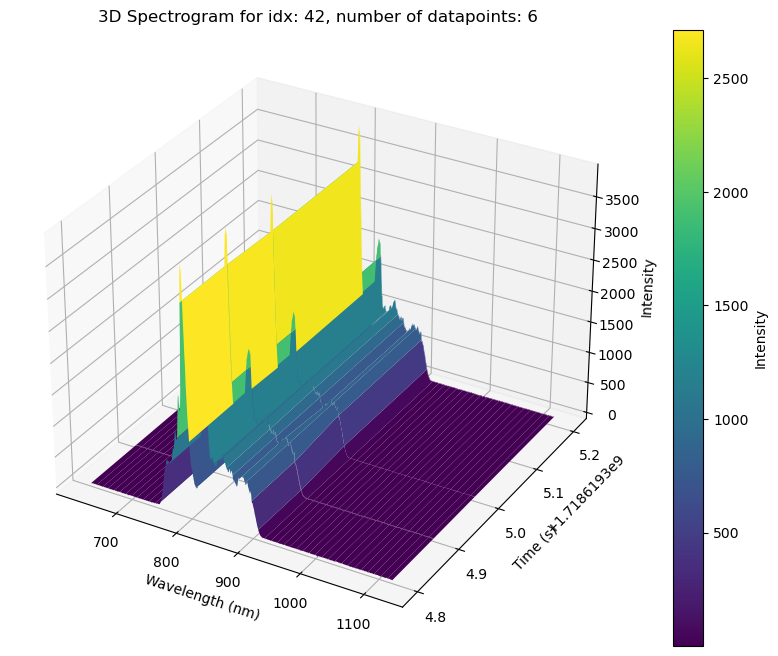

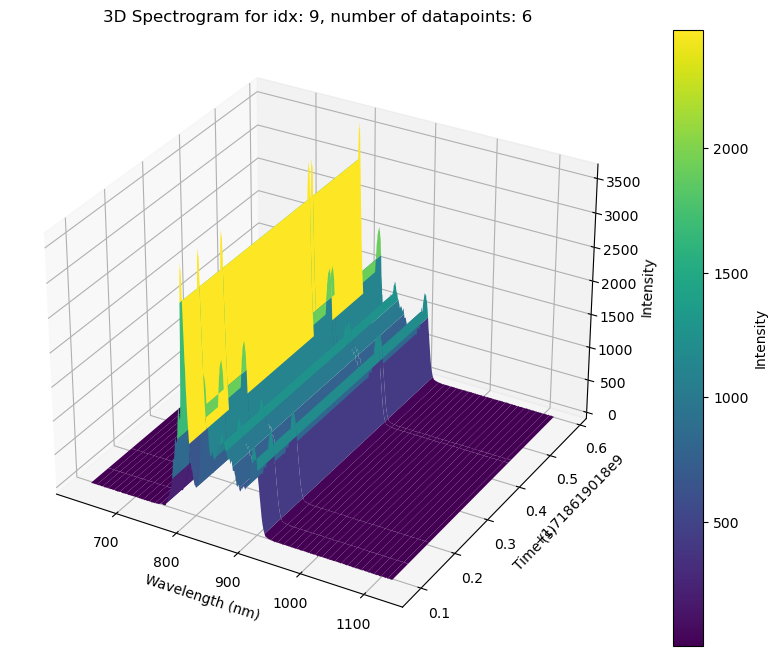

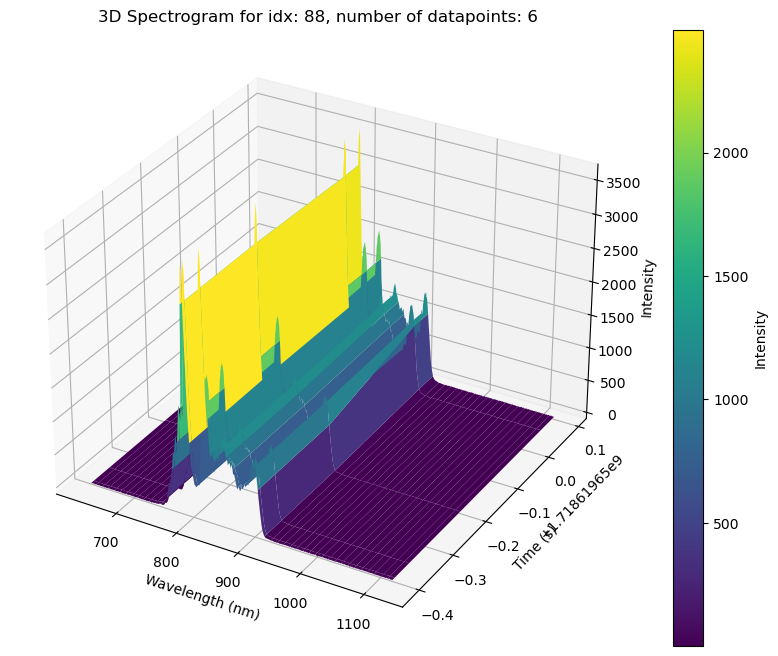

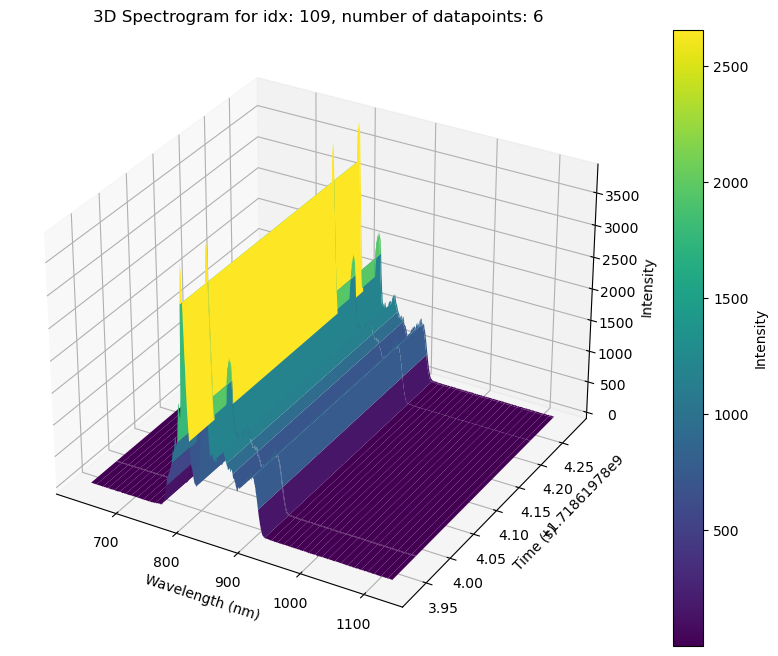

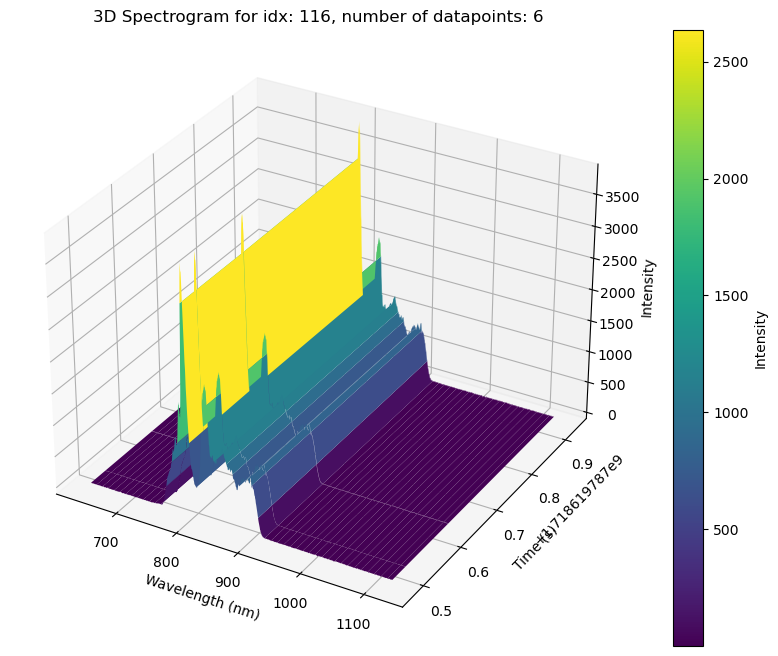

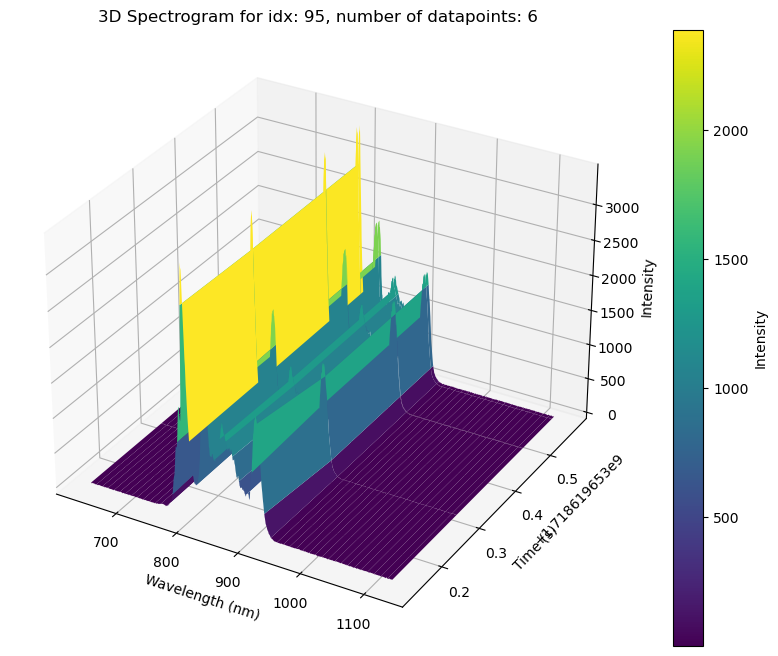

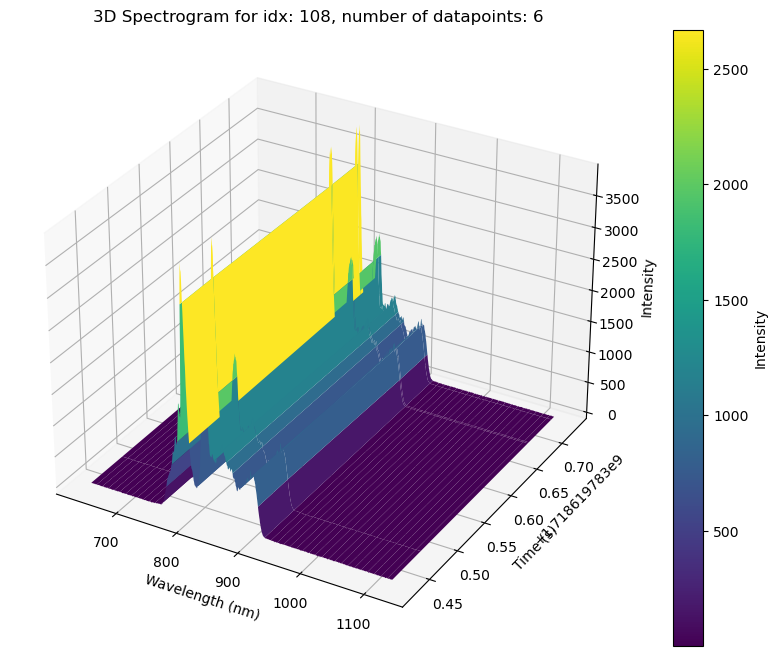

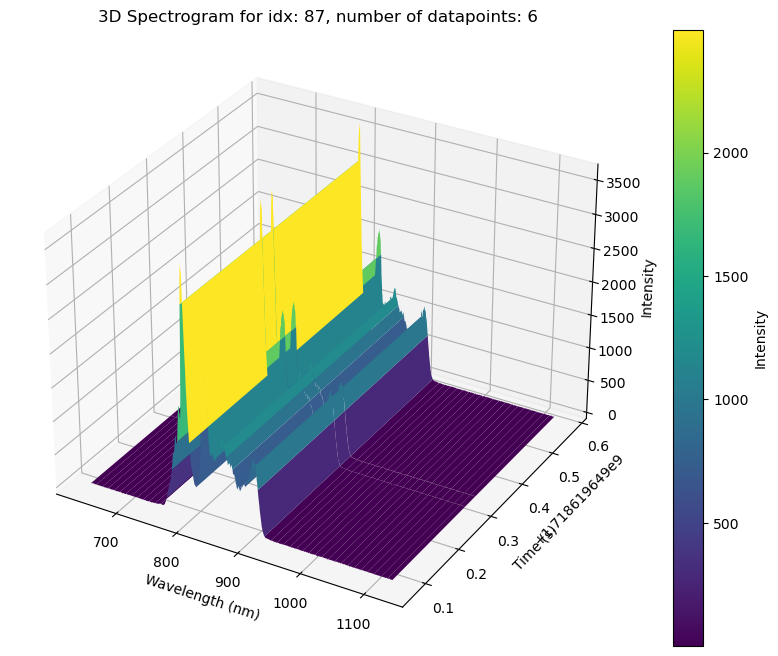

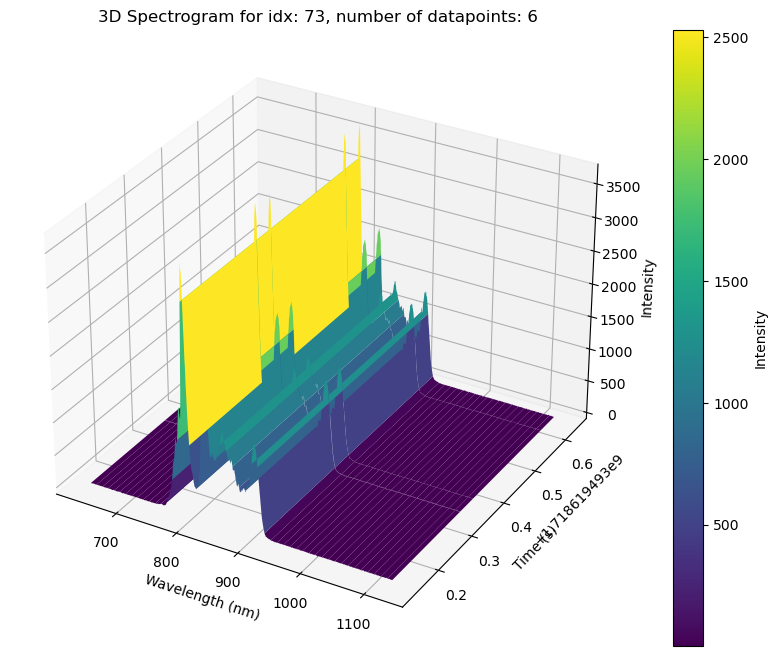

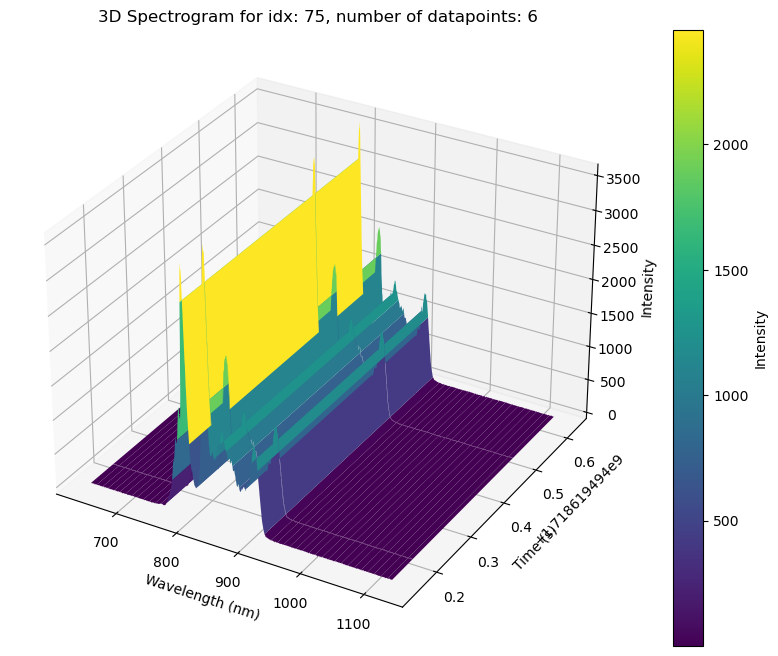

In [14]:
plot_for_frequent_indices(constant_stepper_df, 5)

## Save data

In [15]:
constant_stepper_df.to_csv('data/constant_stepper_stg3.csv', index=False)